# Week 6 coding assignment

In [1]:
%pylab inline

from sympy import *
init_printing(use_unicode = True, fontsize = 16)

pi2 = pi * 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys 

if os.name == 'nt':
    path = ['C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes',
            'C:\\home\\wei\\Dropbox\\Coding\\notebooks\\工具與技術\\DSP\\github\\codes\\MP3_player']
else:
    path = ['/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes',
            '/home/wei/Dropbox/Coding/notebooks/工具與技術/DSP/github/codes/MP3_player']
    
sys.path.extend(path)
data_path = '/home/wei/Dropbox/Coding/notebooks/工具與技術/DSP/github/codes/MP3_player'

from waves.sound import *
from waves.tools.dsp import *

In [12]:
def prototype_filter_remez():
    
    """ ASSIGNMENT 2

        Compute the prototype filter used in subband coding. The filter
        is a 512-point lowpass FIR h[n] with bandwidth pi/64 and stopband
        starting at pi/32

        You should use the remez routine (signal.remez()). See
        http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.remez.html
    """
    
    from scipy import signal
    
    
    M = 512
    Fs = 44100
    F_nyquist = Fs // 2
    
    Fpass = F_nyquist * (1/128)
    Fstop = F_nyquist * (1/32)
    bpass = signal.remez(numtaps = M,
                         bands =  [0, Fpass, Fstop, F_nyquist],
                         desired = [2, 0], Hz = Fs)
    
    return bpass

def prototype_filter2():
    
    """ ASSIGNMENT 2

        Compute the prototype filter used in subband coding. The filter
        is a 512-point lowpass FIR h[n] with bandwidth pi/64 and stopband
        starting at pi/32

        You should use the remez routine (signal.remez()). See
        http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.remez.html
    """
    
    N = 512
    w = DSP.get_freq_bins(N)

    H = np.zeros_like(w)
    H[abs(w) <= np.pi / 128] = 2

    Fourier.plot = False
    h = Fourier.idtft(H, n_samples = N, plt_abs = False)

    return h


prototype_filter = prototype_filter_remez
# prototype_filter = prototype_filter2

In [13]:
def check_assignment2(plot = False):
    
    from parameters import filter_coeffs

    h = prototype_filter()

    # Create the cosine filter bank
    cosine_bank = np.cos(np.pi / 64. * (2 * np.arange(32)[:, np.newaxis] + 1) * (np.arange(h.shape[0]) - 16))
    fb = cosine_bank * h

    # Frequency response
    from numpy import fft

    f = np.arange(257) / 256. / 2.
    H = fft.fft(h)[:257]
    FB = fft.fft(fb, axis = 1)[:, :257].T

    # ideal filter template
    ideal = np.zeros(257)
    f_pass = 1. / 256.  # pass band is set according to standard
    f_stop = 1. / 64.  # stop band
    Ilo = f <= f_pass
    Ihi = f >= f_stop
    I_both = np.logical_or(Ilo, Ihi)
    ideal[f < f_stop] = 0.5
    ideal[f <= f_pass] = 2.

    if plot:
        # plot prototype filter and constraints
        import matplotlib.pyplot as plt

        plt.subplot(2, 1, 1)
        plt.plot(f, np.abs(H))
        plt.plot(f[I_both], ideal[I_both], 'o')

        plt.legend(('prototype filter', 'constraints'))
        plt.title('Prototype Filter')
        plt.xlabel('Normalized frequency')
        plt.ylabel('Magnitude')

        err_hi = np.sqrt(np.sum(np.abs(np.abs(H[Ihi]) - ideal[Ihi]) ** 2))
        if (err_hi < 1e-2):
            plt.xlim((0., 2 * f_stop))

        # plot the filter bank and the sum response
        plt.subplot(2, 1, 2)
        plt.plot(f, np.abs(FB))
        plt.plot(f, np.abs(np.sum(FB, axis = 1)))
        plt.title('Filter Bank')
        plt.xlabel('Normalized frequency')
        plt.ylabel('Magnitude')
        
        plt.tight_layout()
        plt.show()

    # compute the error only on pass band and stop
    # band, not the transition band.
    error = np.abs(ideal[I_both] - np.abs(H[I_both]))

    if error.max() < 0.05:
        print('Congratulations, the filter seems to satisfy the design constraints.')
    else:
        print('The filter fails to satisfy the constraints.')

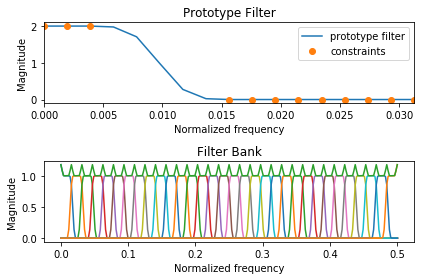

Congratulations, the filter seems to satisfy the design constraints.


In [14]:
check_assignment2(plot = True) 

# import generate_submission
# generate_submission.output('3')

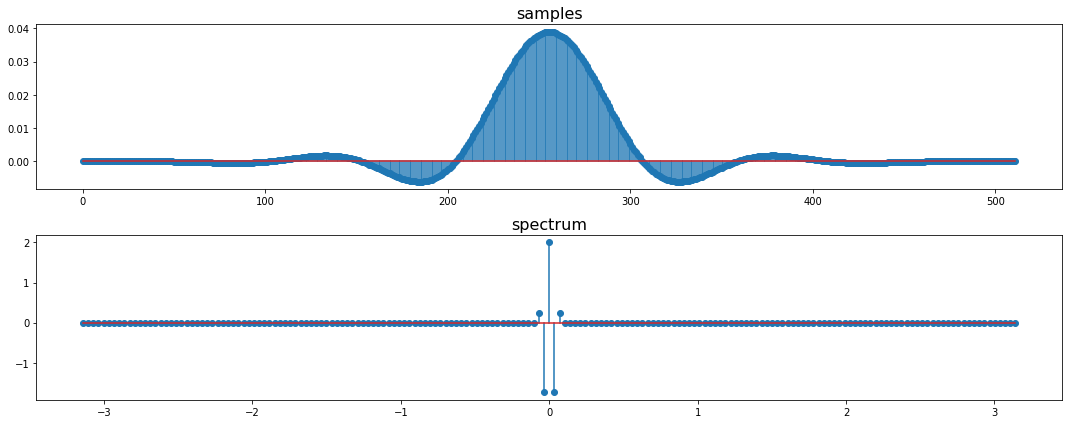

In [15]:
h1 = prototype_filter_remez()
Fourier.plot = True
H1 = Fourier.dtft(h1, plt_abs = False)

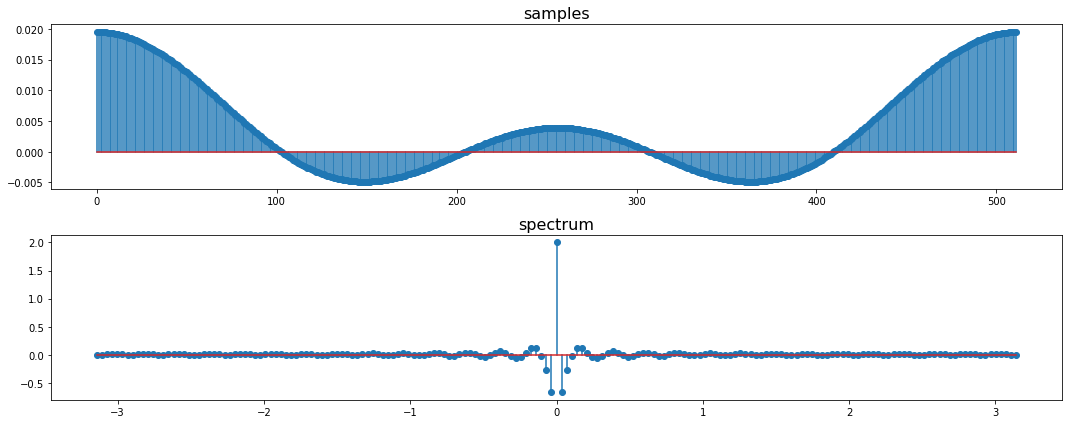

In [16]:
h2 = prototype_filter2()
Fourier.plot = True
H2 = Fourier.dtft(h2, plt_abs = False)

## Remez 所產出的 filter 具有 linear phase 

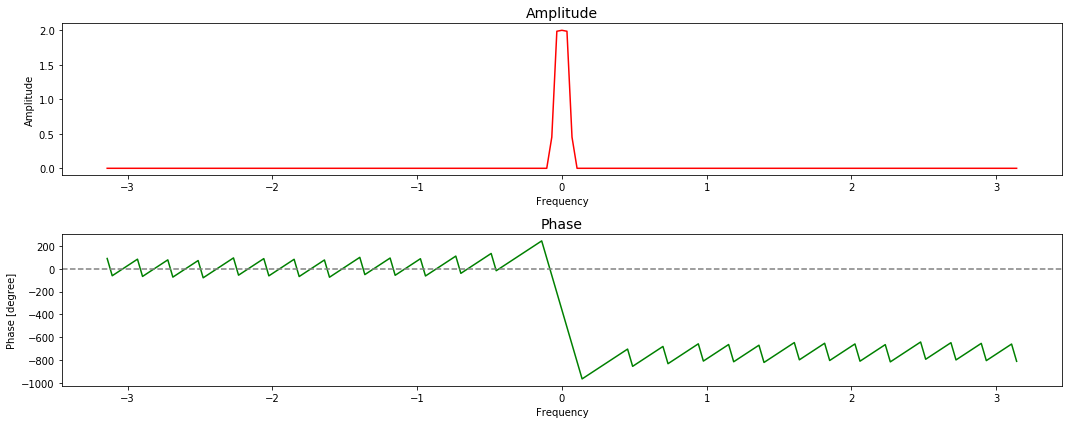

In [17]:
w = DSP.get_freq_bins(len(H1) - 1)
Filter.plot_freq_phase_response_pi2(w, H1)

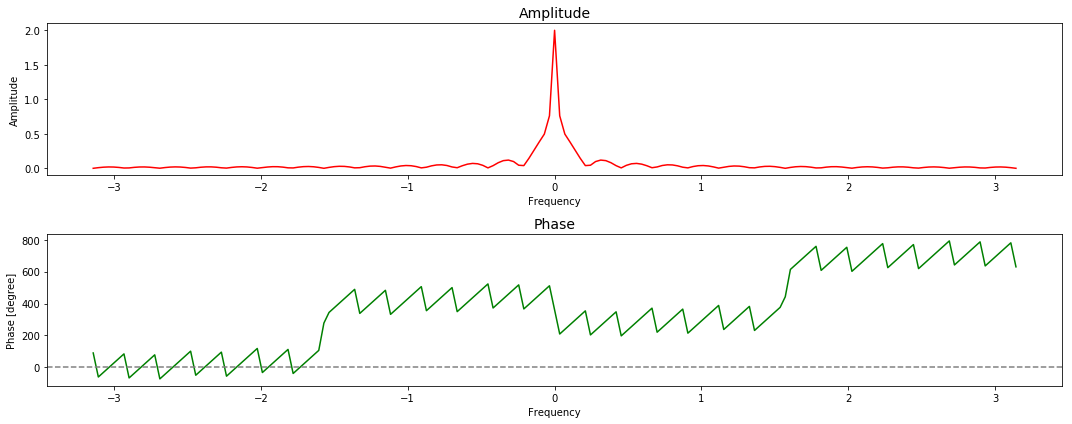

In [18]:
w = DSP.get_freq_bins(len(H2) - 1)
Filter.plot_freq_phase_response_pi2(w, H2)